# Deteccion, analisis y correccion de valores perdidos

# Paquetes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importando datos

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTT6ZSIwic_Cv6nRB7efiebPmQAHy_uM6hIjdkPdyYXqqbdcy2TZOc-V_YT25gZCjBOVcgjt0_VzvgF/pub?gid=769953333&single=true&output=csv")

## Detalle

In [ ]:
data.head()

,atributo1,atributo2,atributo3,precio
0,5.7,6.8,6.6,22800
1,5.0,NaN,6.5,22000
2,6.2,NaN,6.6,25200
3,6.6,5.8,7.7,28700
4,NaN,5.8,7.0,29500


# Detección

## Revision de manera general

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atributo1  164 non-null    float64
 1   atributo2  171 non-null    float64
 2   atributo3  154 non-null    float64
 3   precio     200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


## Deteccion

In [ ]:
data.isnull()

,atributo1,atributo2,atributo3,precio
0,False,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,False,False
4,True,False,False,False
...,...,...,...,...
195,False,False,False,False
196,True,False,False,False
197,False,False,True,False
198,False,False,False,False


In [ ]:
data.isnull().sum()

atributo1    36
atributo2    29
atributo3    46
precio        0
dtype: int64

In [ ]:
data.dropna()

,atributo1,atributo2,atributo3,precio
0,5.7,6.8,6.6,22800
3,6.6,5.8,7.7,28700
5,5.7,6.8,6.1,23400
6,5.4,8.0,6.3,16800
7,5.0,8.4,4.2,19800
...,...,...,...,...
189,5.3,6.6,5.4,27100
192,5.6,7.0,6.5,20900
195,5.9,7.3,5.4,23200
198,6.6,7.5,6.8,21600


## Visualizando

<Axes: >

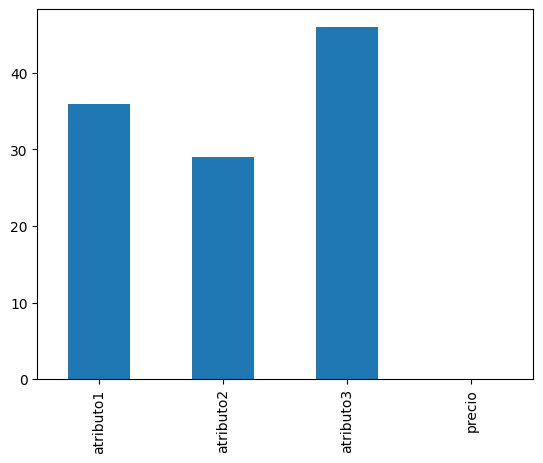

In [ ]:
data.isnull().sum().plot(kind='bar')

# Analisis

## Visualizando

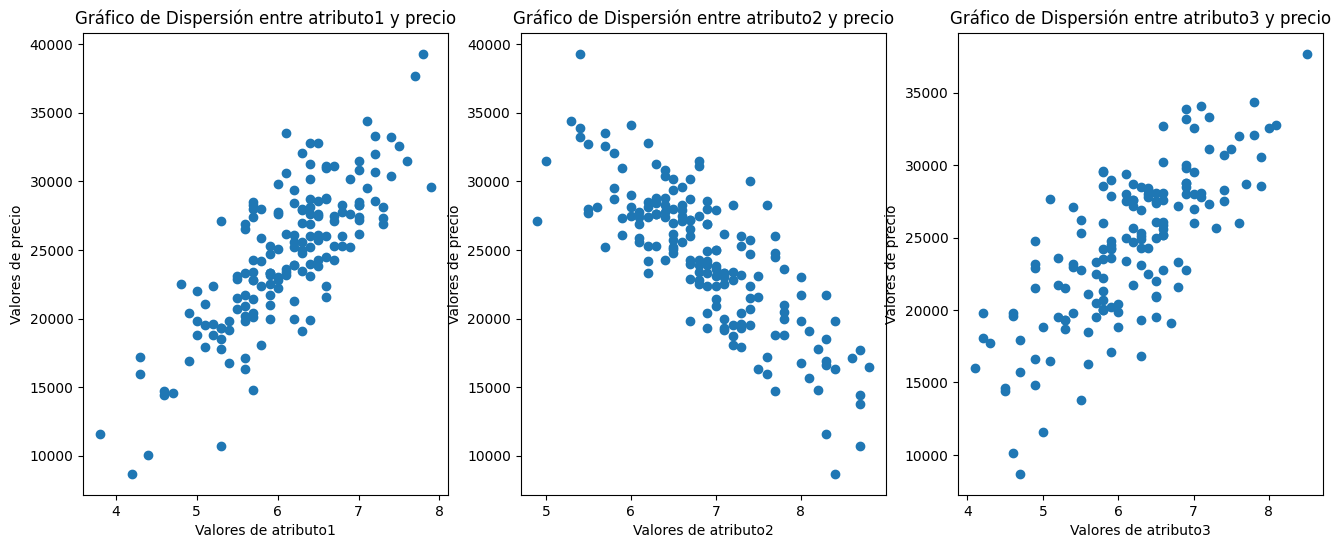

In [ ]:
vars = ['atributo1','atributo2','atributo3']

fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data[vars[x]], data['precio'], marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
plt.show()

## Filas completas e incompletas

In [ ]:
data.isnull().sum(axis=1)>0

0      False
1       True
2       True
3      False
4       True
       ...  
195    False
196     True
197     True
198    False
199    False
Length: 200, dtype: bool

In [ ]:
data['completo'] = np.where(data.isnull().sum(axis=1)==0,"Completo","Incompleto")
data_c = data.query("completo=='Completo'")
data_i = data.query("completo=='Incompleto'")

<Axes: ylabel='completo'>

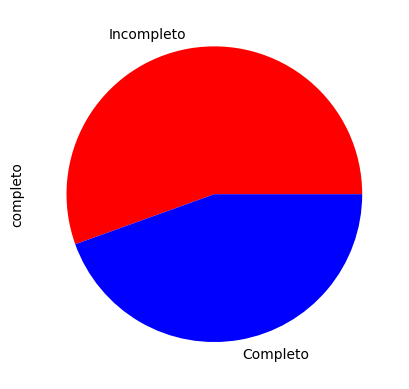

In [ ]:
data.completo.value_counts().plot(kind='pie',colors = ['r','b'])

## Perdida de información multiple

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atributo1  164 non-null    float64
 1   atributo2  171 non-null    float64
 2   atributo3  154 non-null    float64
 3   precio     200 non-null    int64  
 4   completo   200 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
data_c.shape

(89, 5)

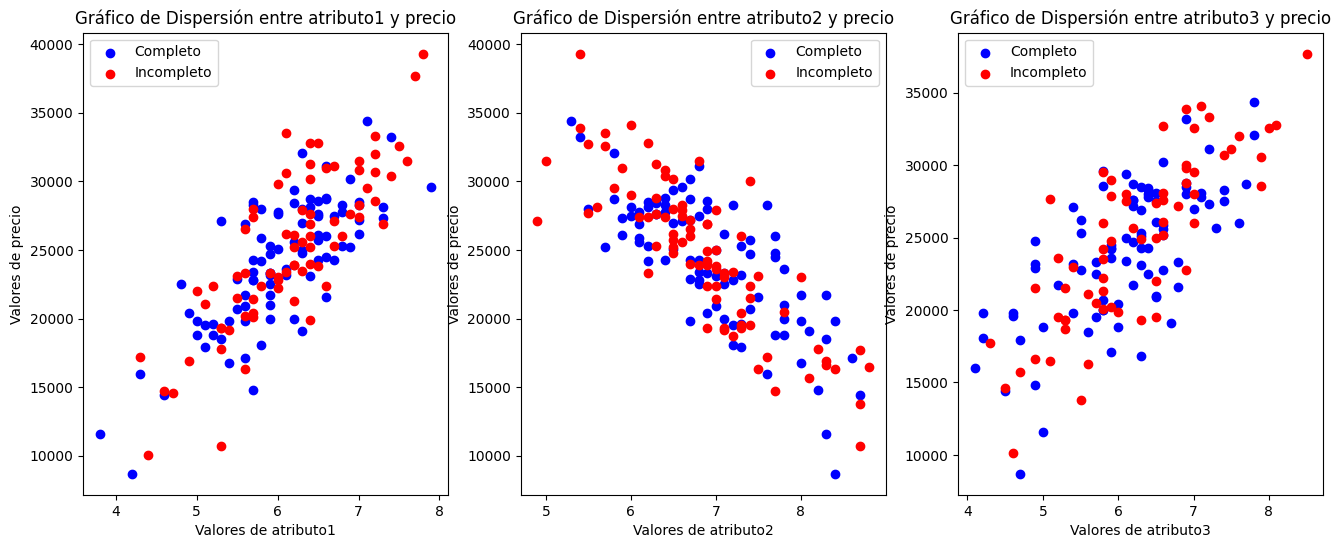

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_c[vars[x]], data_c['precio'], label='Completo',c='b', marker='o')
  axs[x].scatter(data_i[vars[x]], data_i['precio'], label='Incompleto',c='r', marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

## Distribución actual

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

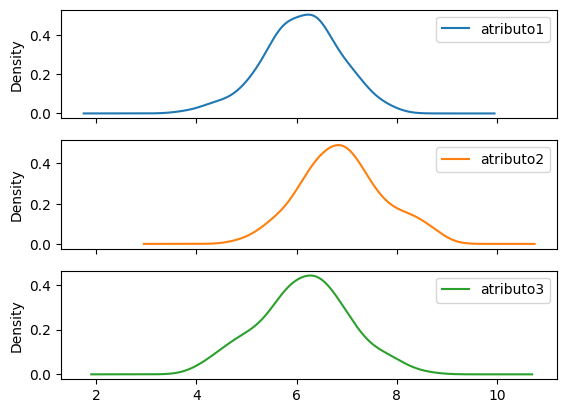

In [ ]:
data[vars].plot.kde(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

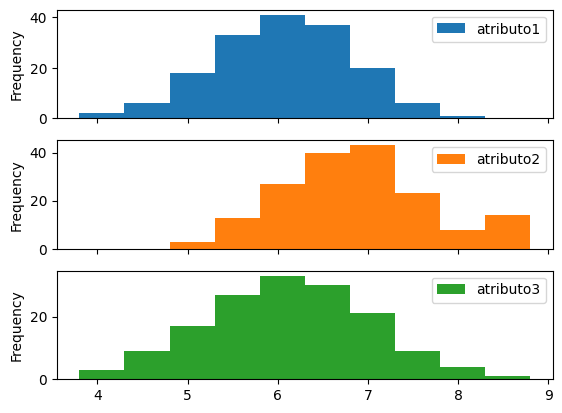

In [ ]:
data[vars].plot.hist(subplots=True)

In [ ]:
data.corr()

<ipython-input-32-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.582469,0.634946,0.793816
atributo2,-0.582469,1.000000,-0.573408,-0.806845
atributo3,0.634946,-0.573408,1.000000,0.747703
precio,0.793816,-0.806845,0.747703,1.000000


# Correccíon

## Inputacion con cero

### Imputando datos

In [ ]:
data.fillna(0)

,atributo1,atributo2,atributo3,precio,completo
0,5.7,6.8,6.6,22800,Completo
1,5.0,0.0,6.5,22000,Incompleto
2,6.2,0.0,6.6,25200,Incompleto
3,6.6,5.8,7.7,28700,Completo
4,0.0,5.8,7.0,29500,Incompleto
...,...,...,...,...,...
195,5.9,7.3,5.4,23200,Completo
196,0.0,7.0,5.2,23600,Incompleto
197,5.9,7.1,0.0,23300,Incompleto
198,6.6,7.5,6.8,21600,Completo


In [ ]:
data_filled_0 = data.fillna(0)

In [ ]:
data_filled_0.isnull().sum()

atributo1    0
atributo2    0
atributo3    0
precio       0
completo     0
dtype: int64

### Distribucion nueva

In [ ]:
data.mean()

<ipython-input-27-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


atributo1        6.100610
atributo2        6.905263
atributo3        6.148701
precio       24554.500000
dtype: float64

In [ ]:
data_filled_0.mean()

<ipython-input-28-aa19cfe00bf2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_0.mean()


atributo1        5.0025
atributo2        5.9040
atributo3        4.7345
precio       24554.5000
dtype: float64

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

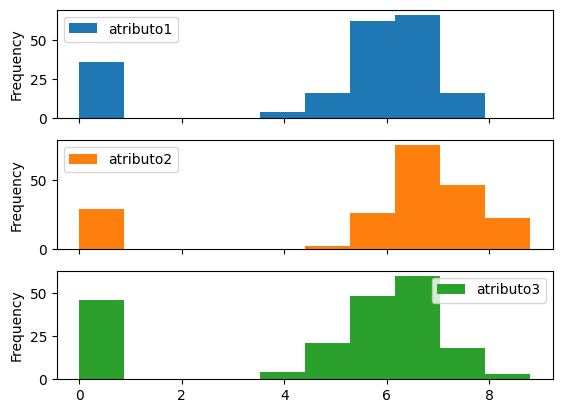

In [ ]:
data_filled_0[vars].plot.hist(subplots=True)

### Dispersion nueva

In [ ]:
col={True:'r',False:'b'}

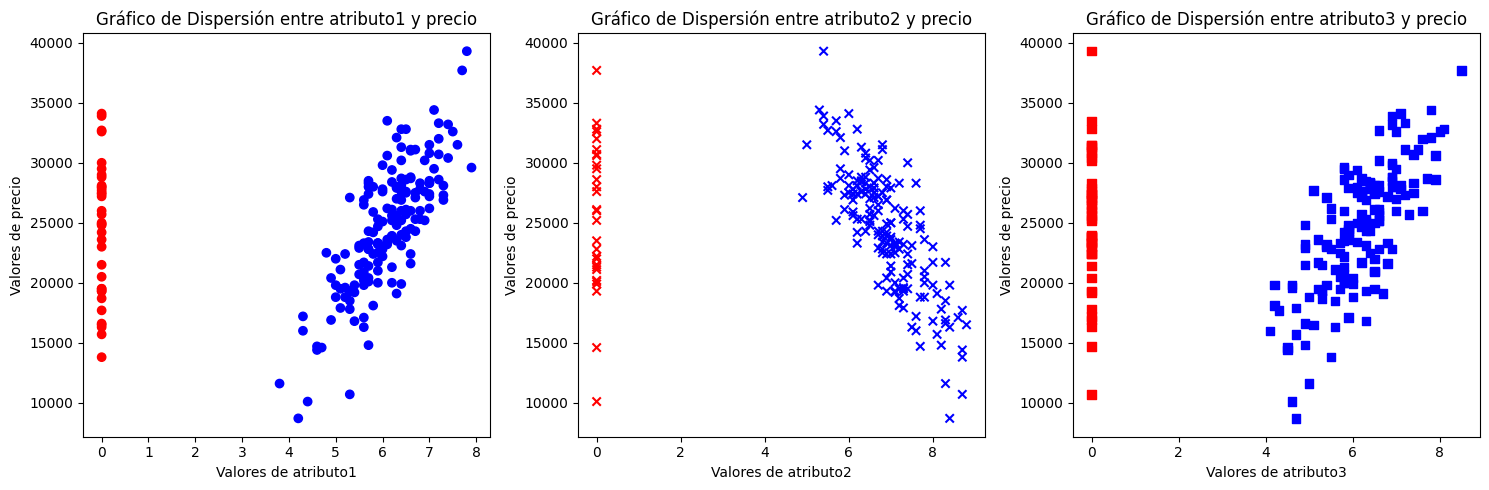

In [ ]:
# Crear subplots de 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(data_filled_0['atributo1'], data_filled_0['precio'],c=data.isnull().atributo1.map(col), label='atributo1', marker='o')
axs[0].set_xlabel('Valores de atributo1')
axs[0].set_ylabel('Valores de precio')
axs[0].set_title('Gráfico de Dispersión entre atributo1 y precio')

axs[1].scatter(data_filled_0['atributo2'], data_filled_0['precio'],c=data.isnull().atributo2.map(col), label='atributo2', marker='x')
axs[1].set_xlabel('Valores de atributo2')
axs[1].set_ylabel('Valores de precio')
axs[1].set_title('Gráfico de Dispersión entre atributo2 y precio')

# Gráfico de dispersión para x3 vs. y
axs[2].scatter(data_filled_0['atributo3'], data_filled_0['precio'],c=data.isnull().atributo3.map(col), label='atributo3', marker='s')
axs[2].set_xlabel('Valores de atributo3')
axs[2].set_ylabel('Valores de precio')
axs[2].set_title('Gráfico de Dispersión entre atributo3 y precio')

# Mostrar los subplots
plt.tight_layout()
plt.show()

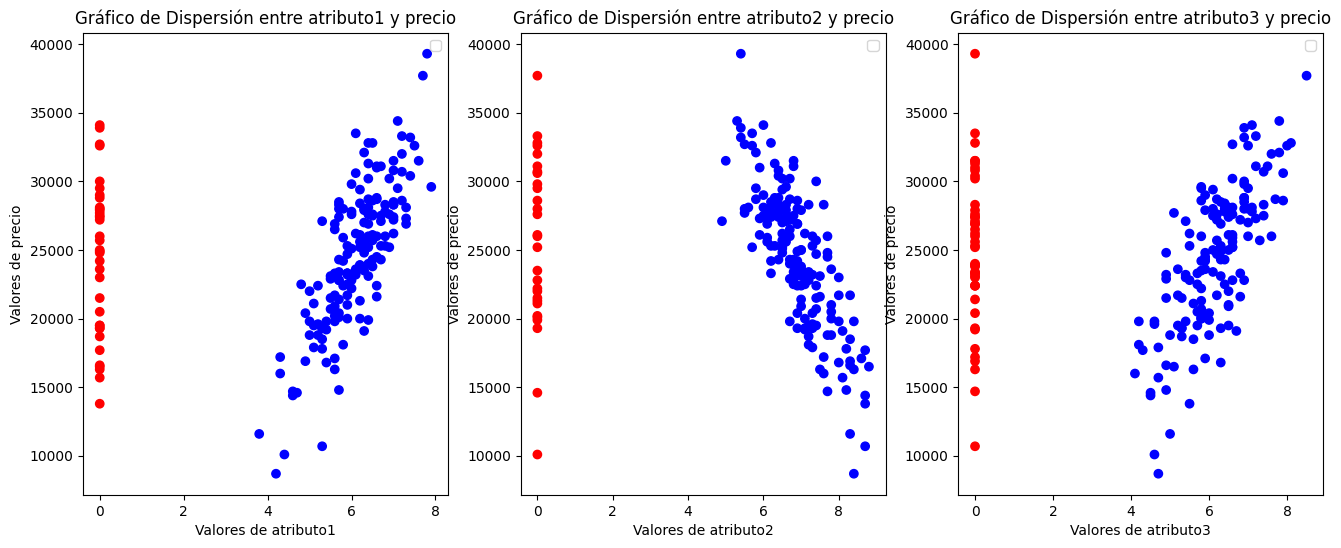

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_filled_0[vars[x]], data_filled_0['precio'], c=data.isnull()[vars[x]].map(col), marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

## Imputación por media

### Imputando datos

In [ ]:
data.mean()

<ipython-input-33-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


atributo1        6.100610
atributo2        6.905263
atributo3        6.148701
precio       24554.500000
dtype: float64

In [ ]:
data_filled_mean = data.fillna(data.mean())

<ipython-input-34-2b0f6a2924b7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_mean = data.fillna(data.mean())


### Distribucion nueva

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

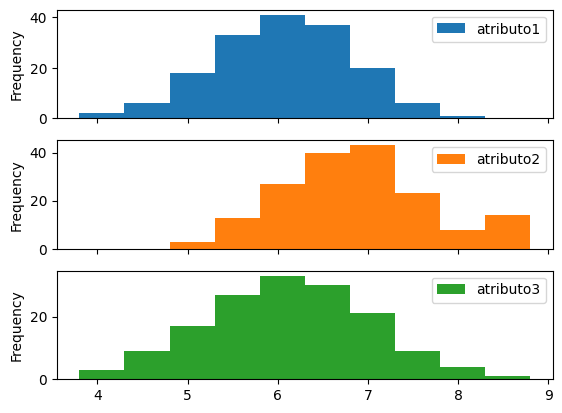

In [ ]:
data[vars].plot.hist(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

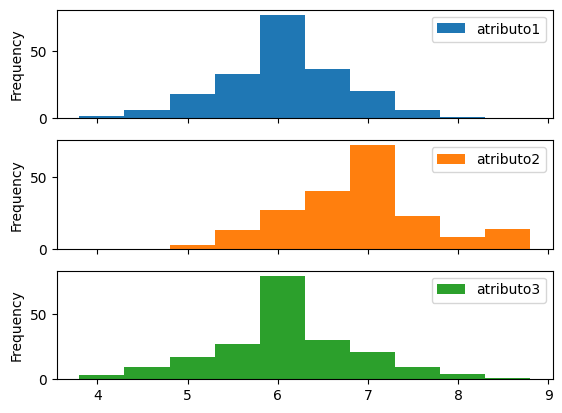

In [ ]:
data_filled_mean[vars].plot.hist(subplots=True)

### Dispersion nueva

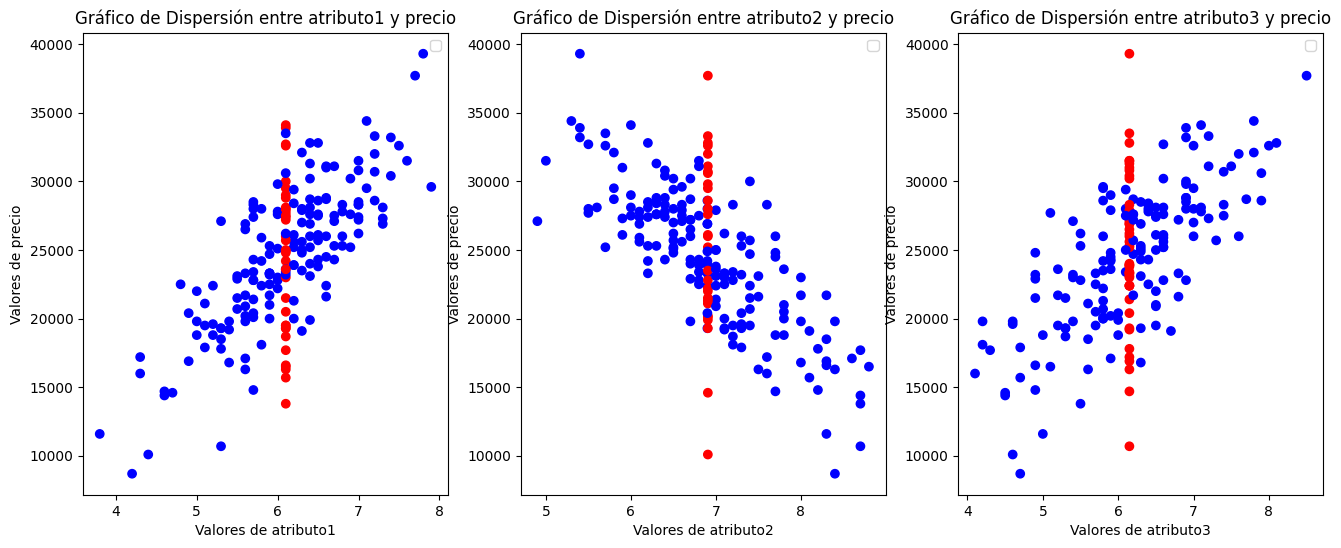

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_filled_mean[vars[x]], data_filled_mean['precio'], c=data.isnull()[vars[x]].map(col), marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

## Imputación por K vecinos mas cercanos

In [ ]:
from sklearn.impute import KNNImputer

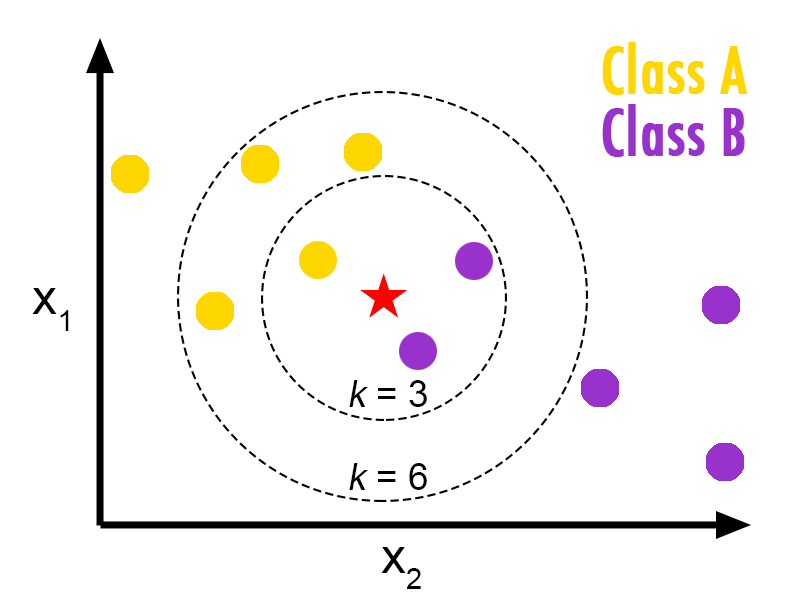

### Imputando datos

In [ ]:
data[vars]

,atributo1,atributo2,atributo3
0,5.7,6.8,6.6
1,5.0,NaN,6.5
2,6.2,NaN,6.6
3,6.6,5.8,7.7
4,NaN,5.8,7.0
...,...,...,...
195,5.9,7.3,5.4
196,NaN,7.0,5.2
197,5.9,7.1,NaN
198,6.6,7.5,6.8


In [ ]:
# creando maquina
knn_imputer = KNNImputer(n_neighbors=5)

# Imputar valores faltantes utilizando KNN
data_imputed_knn = knn_imputer.fit_transform(data[['atributo1','atributo2','atributo3','precio']])

data_imputed_knn[0:10]#para solo ver las 10 primeras filas

array([[5.70e+00, 6.80e+00, 6.60e+00, 2.28e+04],
       [5.00e+00, 7.54e+00, 6.50e+00, 2.20e+04],
       [6.20e+00, 6.44e+00, 6.60e+00, 2.52e+04],
       [6.60e+00, 5.80e+00, 7.70e+00, 2.87e+04],
       [6.76e+00, 5.80e+00, 7.00e+00, 2.95e+04],
       [5.70e+00, 6.80e+00, 6.10e+00, 2.34e+04],
       [5.40e+00, 8.00e+00, 6.30e+00, 1.68e+04],
       [5.00e+00, 8.40e+00, 4.20e+00, 1.98e+04],
       [5.20e+00, 6.90e+00, 6.00e+00, 2.24e+04],
       [5.20e+00, 7.80e+00, 6.00e+00, 1.88e+04]])

In [ ]:
# Convertir el resultado a un DataFrame
data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=['atributo1','atributo2','atributo3','precio'])

#data_imputed_knn = pd.concat([data_imputed_knn, data['precio']], axis=1)

# Verificar el DataFrame resultante
data_imputed_knn

,atributo1,atributo2,atributo3,precio
0,5.70,6.80,6.60,22800.0
1,5.00,7.54,6.50,22000.0
2,6.20,6.44,6.60,25200.0
3,6.60,5.80,7.70,28700.0
4,6.76,5.80,7.00,29500.0
...,...,...,...,...
195,5.90,7.30,5.40,23200.0
196,6.14,7.00,5.20,23600.0
197,5.90,7.10,5.78,23300.0
198,6.60,7.50,6.80,21600.0


### Distribucion nueva

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

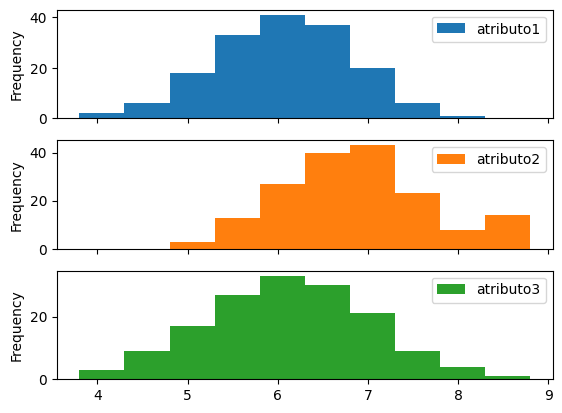

In [ ]:
data[vars].plot.hist(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

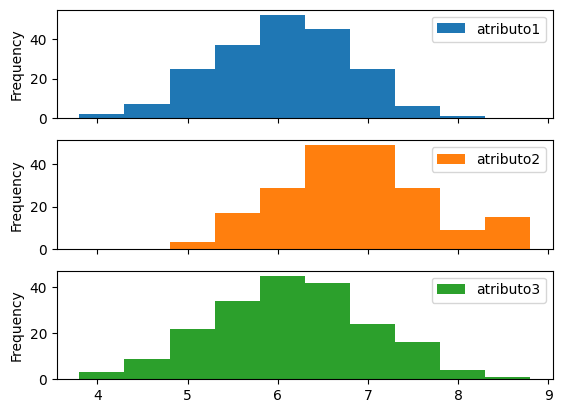

In [ ]:
data_imputed_knn[vars].plot.hist(subplots=True)

### Dispersion nueva

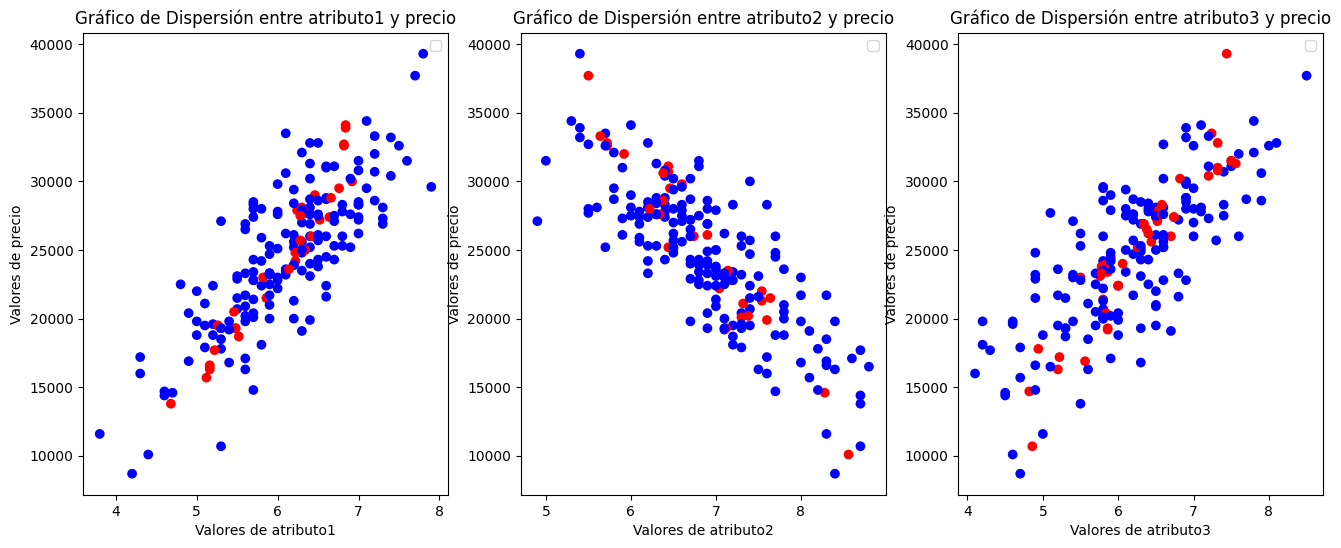

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_imputed_knn[vars[x]], data_imputed_knn['precio'], c=data.isnull()[vars[x]].map(col), marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()